[[4 0 0 0]
 [0 7 0 0]
 [0 0 3 0]
 [0 0 0 6]]


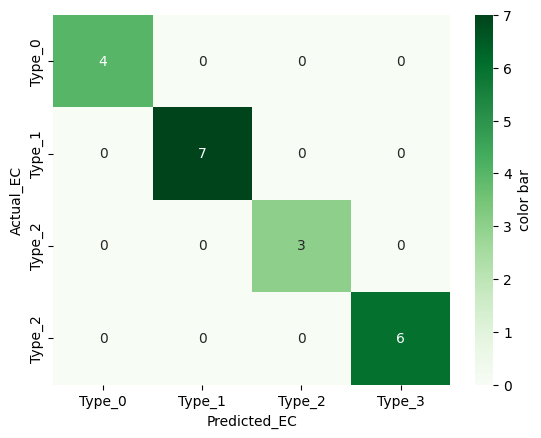

K cross validation :
Accuracy: 85.00 %
Standard Deviation: 13.84 %


In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv(r'C:\Users\ASUS\Desktop\EIS\Simulated EIS data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
accuracy_score(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm1,cmap="Greens",annot=True,cbar_kws={"label":"color bar"},
            xticklabels=["Type_0", "Type_1", "Type_2", "Type_3"],yticklabels=["Type_0", "Type_1", "Type_2", "Type_2"])
plt.xlabel("Predicted_EC")
plt.ylabel("Actual_EC")
plt.show()

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("K cross validation :")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


In [33]:
import pandas as pd
import numpy as np

input_csv = r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Individual Data\CSV\1.5 Bias.csv'

df = pd.read_csv(input_csv)
new_data_points = 61
interpolated_df = pd.DataFrame()

for column in df.columns:
    x = np.linspace(0, len(df[column]) - 1, len(df[column]))
    x_new = np.linspace(0, len(df[column]) - 1, new_data_points)
    y = df[column].values
    y_interp = np.interp(x_new, x, y)
    interpolated_df[column] = y_interp

output_csv = r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Interpolated Data\Interpolated 1.5 Bias.csv'
interpolated_df.to_csv(output_csv, index=False)

interpolated_data = pd.read_csv(r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Interpolated Data\Interpolated 1.5 Bias.csv')
transposed_data = interpolated_data.transpose()

output_csv = r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Transposed Data\Transposed 1.5 Bias.csv'
transposed_data.to_csv(output_csv, index=False)

# Assuming 'transposed_interpolated_data.csv' is the name of your transposed CSV file
transposed_data = pd.read_csv(r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Transposed Data\Transposed 1.5 Bias.csv')
# Flatten the transposed data and concatenate into a single row
flattened_data = pd.concat([pd.Series(transposed_data.values.flatten())], ignore_index=True)
# Save the flattened data to a new CSV file
output_csv = r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Concatinated Data\Concatinated 1.5 Bias.csv'
flattened_data.to_csv(output_csv, index=False, header=False)

In [114]:
new_input = pd.read_csv(r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Fitting\0.1 Bias Final Data for fitting.csv')
X_Bias = sc.fit_transform(new_input)
class_probs = classifier.predict_proba(X_Bias)
print(class_probs)

#new_input = pd.read_csv(r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Concatinated Data\Bias Final Data.csv')
prediction = classifier.predict(X_Bias)
print(prediction)

[[1. 0. 0. 0.]]
[0]


c:\Python311\Lib\site-packages\impedance\models\circuits\elements.py:170: RuntimeWarning: overflow encountered in tanh
  Z = Z0 / (np.sqrt(1j * omega * tau) * np.tanh(np.sqrt(1j * omega * tau)))
c:\Python311\Lib\site-packages\impedance\visualization.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)
c:\Python311\Lib\site-packages\impedance\visualization.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)


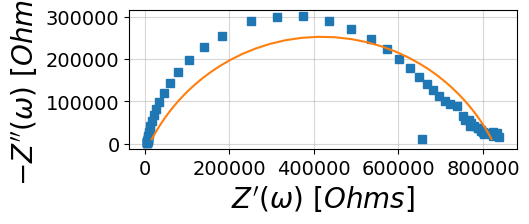

Circuit Type [0]

Circuit string: R_0-p(CPE_1,R_1-p(CPE_2,R_2-Wo_1))
Fit: True

Initial guesses:
    R_0 = 9.00e+04 [Ohm]
  CPE_1_0 = 4.52e-08 [Ohm^-1 sec^a]
  CPE_1_1 = 4.00e-01 []
    R_1 = 1.49e+06 [Ohm]
  CPE_2_0 = 3.00e-07 [Ohm^-1 sec^a]
  CPE_2_1 = 4.00e-01 []
    R_2 = 5.00e+07 [Ohm]
  Wo_1_0 = 5.00e+09 [Ohm]
  Wo_1_1 = 8.00e+04 [sec]

Fit parameters:
    R_0 = 1.17e+04  (+/- 6.57e+03) [Ohm]
  CPE_1_0 = 1.33e-09  (+/- 3.59e-10) [Ohm^-1 sec^a]
  CPE_1_1 = 7.08e-01  (+/- 4.40e-03) []
    R_1 = 8.14e+05  (+/- 2.62e+03) [Ohm]
  CPE_2_0 = 1.13e+01  (+/- 3.13e-01) [Ohm^-1 sec^a]
  CPE_2_1 = 8.13e-01  (+/- 1.94e+01) []
    R_2 = 7.20e+07  (+/- 0.00e+00) [Ohm]
  Wo_1_0 = 1.50e+10  (+/- 0.00e+00) [Ohm]
  Wo_1_1 = 2.97e+04  (+/- 0.00e+00) [sec]



In [115]:
from impedance import preprocessing
from impedance.models.circuits import Randles, CustomCircuit
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist
from impedance.models.circuits import Randles, CustomCircuit
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist


if prediction == 0 :
  frequencies, Z = preprocessing.readCSV(r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Extraction\0.1 Bias data for extraction.csv')
  frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
  customCircuit = CustomCircuit(initial_guess=[9.0e+04, 4.52e-08 , 4.0e-01, 1.49e+06, 3.0e-07, 4.0e-01, 5.0e+07, 5.0e+09, 8.0e+04],
                                circuit='R_0 - p(CPE_1, R_1 - p(CPE_2, R_2 - Wo_1))')
  customCircuit.fit(frequencies, Z)
  customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
  plt.show()
  print('Circuit Type', prediction)
  print(customCircuit)
elif prediction == 1 :
  frequencies, Z = preprocessing.readCSV(r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Extraction\0.1 Bias data for extraction.csv')
  frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
  customCircuit = CustomCircuit(initial_guess=[7.0e+04, 7.0e+04, 1.0e-06, 2.50e-01, 1.0e+05  , 2.0e-09,  8.0e-01],
                                circuit='R_0-p(R_1,CPE_1)-p(R_2,CPE_2)')
  customCircuit.fit(frequencies, Z)
  customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
  plt.show()
  print('Circuit Type', prediction)
  print(customCircuit)
elif prediction == 2 :
  frequencies, Z = preprocessing.readCSV(r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Extraction\0.1 Bias data for extraction.csv')
  frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
  customCircuit = CustomCircuit(initial_guess=[1.0e+05, 2.0e+05, 5.0e-09, 7.0e-01],
                                circuit='R_0-p(R_1,CPE_1)')
  customCircuit.fit(frequencies, Z)
  customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
  plt.show()
  print('Circuit Type', prediction)
  print(customCircuit)
else :
  frequencies, Z = preprocessing.readCSV(r'C:\Users\ASUS\Desktop\EIS\Bias changes\Bias Data CSV\Extraction\0.1 Bias data for extraction.csv')
  frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
  customCircuit = CustomCircuit(initial_guess=[7.0e+04, 7.0e+04, 1.02e-06, 2.50e-01, 1.0e+05  , 2.0e-09,  8.0e-01],
                                circuit='R_0 - p(CPE_1,R_1) - p(CPE_2,R_2 - p(L_3, R_3))')
  customCircuit.fit(frequencies, Z)
  customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
  plt.show()
  print('Circuit Type', prediction)
  print(customCircuit)